In [2]:
!pip install igraph
import igraph as ig
import random


     |████████████████████████████████| 3.2 MB 5.4 MB/s 


In [3]:
# This advice comes from https://github.com/pygobject/pycairo/issues/39#issuecomment-391830334
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
import cairo
from google.colab import files
from IPython.display import SVG, display, Image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
libgif-dev set to manually installed.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpixman-1-dev amd64 0.34.0-2 [244 kB]
Get:3 http://archive.ubuntu.com/ubuntu bio

In [6]:
random.seed(359)
n, m = 100, 200
gr = ig.Graph.Erdos_Renyi(n=n, m=m)

Could not get pycairo to work :/

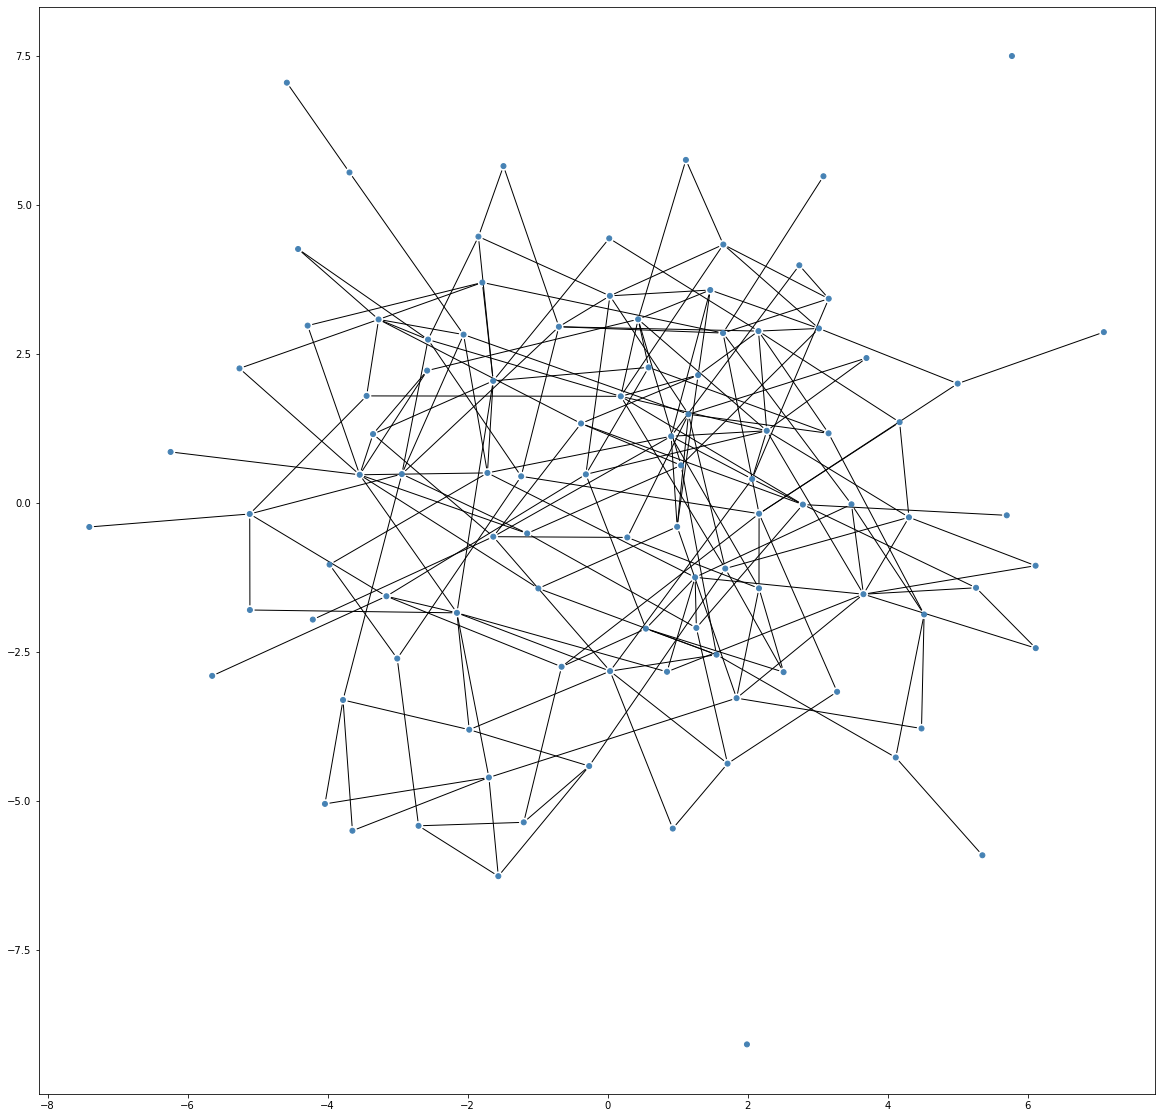

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ig.plot(gr, target=ax)

**Adjacency matrix & Adjacency list**

In [10]:
print("Adjacency matrix:\n", gr.get_adjacency()[0:12, 0:12])
print("Adjacency list:\n", gr.get_adjlist()[0:12])

Adjacency matrix:
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
Adjacency list:
 [[62, 74], [28, 50, 87], [17, 61, 64, 66, 88, 91], [11, 46, 61, 73], [35, 66], [39, 42, 89], [12, 59, 78, 89, 95, 99], [13, 36, 46], [63, 67, 76], [24, 32, 47], [13, 42, 58, 66, 97], [3, 30, 36, 49, 85]]


**Depth-first search**

In [30]:
def dfs(node, component):
    # marking node as visited.
    visited[node] = True

    # appending node in the component list
    component.append(node)
    # visiting neighbours of the current node
    for neighbour in graph[node]:
        # if the node is not visited then we call dfs on that node.
        if visited[neighbour] == False:
            dfs(neighbour, component)

visited = [False for i in range(n+1)]
components = []
graph = gr.get_adjlist()

for i in range(n):
    if visited[i] == False:
        component = []
        dfs(i, component)
        components.append(component)

print('Length = ', len(components), '\nComponents: ', components)
print(gr.components())
print(set(components[0]) == set(gr.components()[0]))
print(set(components[1]) == set(gr.components()[1]))

Length =  3 
Components:  [[0, 62, 13, 7, 36, 11, 3, 46, 17, 2, 61, 27, 22, 24, 9, 32, 16, 81, 82, 44, 87, 1, 28, 31, 66, 4, 35, 10, 42, 5, 39, 14, 20, 21, 63, 8, 67, 19, 47, 51, 57, 75, 58, 18, 76, 38, 33, 40, 50, 25, 72, 60, 68, 30, 12, 6, 59, 15, 85, 49, 48, 77, 43, 56, 41, 64, 93, 71, 74, 65, 55, 70, 89, 34, 79, 88, 95, 53, 45, 37, 73, 78, 23, 99, 92, 94, 86, 29, 96, 97, 69, 80, 84, 83, 91, 98, 26, 52], [54], [90]]
Clustering with 100 elements and 3 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57,
    58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94,
    95, 96, 97, 98, 99
[1] 54
[2] 90
True
True


**Breadth-first search**

In [31]:
def bfs(graph, start, end):
    # maintain a queue of paths
    queue = []
    # push the first path into the queue
    queue.append([start])
    while queue:
        # get the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        # path found
        if node == end:
            return path
        # enumerate all adjacent nodes, construct a 
        # new path and push it into the queue
        if graph[node]:
            for adjacent in graph[node]:
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        else:
            new_path = list(path)
            new_path.append([])
            queue.append(new_path)

print("Implemeted BFS:", bfs(graph, 3, 59))
print("Shortest path (from igraph):", gr.get_shortest_paths(3, 59))

Implemeted BFS: [3, 11, 30, 59]
Shortest path (from igraph): [[3, 11, 30, 59]]
